# TopSBM: Topic Modeling with Stochastic Block Models

In [3]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

from matplotlib import pyplot as plt

# Fitting the model

In [4]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
#model.make_graph(texts,documents=titles)

In [5]:
## we can also skip the previous step by saving/loading a graph
#model.save_graph(filename = 'graph.xml.gz')
model.load_graph(filename = 'graph_counts.xml.gz')

In [6]:
g=model.g
clabel = g.vp['kind']
state_args = {'clabel': clabel, 'pclabel': clabel}
if "count" in g.ep:
    state_args["eweight"] = g.ep.count

In [7]:
state = gt.minimize_nested_blockmodel_dl(g,B_min=2, B_max=60,overlap=True, verbose=True, nonoverlap_init=False,deg_corr=True)

    l=1  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=1  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=1  Bisect at B = 1 with S = 16.97037277990603
    l=1  Best result: B = 1, S = 16.97037277990603
level 1 : rejected replacement (2, 1) -> (2, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=1  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=1  Bisect at B = 1 with S = 16.97037277990603
    l=1  Best result: B = 1, S = 16.97037277990603
level 1 : rejected insert 2 , dS: 1.3862943611202354
    l=0      B: 26 <- 60    shrinking 60 -> 46
    l=0      B: 26 <- 60    B=46  niter:     1  count:    0  breaks:  0  min_S: 19326.747  max_S: 19341.306  S: 19326.747  ΔS:     -14.5587  moves:     8 
    l=0      B: 26 <- 60    B=46  niter:     2  count:    0  breaks:  0  min_S: 19322.724  max_S: 19341.3

    l=1      B: 2 <- 3    B=2  niter:     1  count:    1  breaks:  1  min_S: 365.86621  max_S: 365.86621  S: 365.86621  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (1, 3, 5) (619.5254934539918, 368.6659316793042, 382.97854629039796)
    l=1  Bisect at B = 2 with S = 365.8662086582851
    l=1  Current bracket: (1, 2, 3) (619.5254934539918, 365.86620865828513, 368.6659316793042)
    l=1  Bisect at B = 1 with S = 619.5254934539918
    l=1  Best result: B = 2, S = 365.8662086582851
level 1 : replaced (16, 1) -> (16, 2) , dS: -253.6592847957072 3
    l=2  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=2  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102592)
    l=2  Bisect at B = 1 with S = 16.97037277990603
    l=2  Best result: B = 1, S = 16.97037277990603
level 2 : rejected replacement (2, 1) -> (2, 1) , dS: 0.0
    l=2  Current bracket: (1, 1, 2) (16.97037277990603, 16.97037277990603, 18.35666714102

In [8]:
state

<NestedBlockState object, with base <OverlapBlockState object with 16 blocks, degree corrected, for graph <Graph object, undirected, with 1409 vertices and 4841 edges at 0x7f908e51ddd8>, at 0x7f9043b5ae80>, and 3 levels of sizes [(1409, 16), (16, 2), (2, 1)] at 0x7f9044dd89b0>

In [9]:
state.draw(layout='bipartite', output='bipartite_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f908e51ddd8, at 0x7f909283a5f8>,
 <Graph object, directed, with 1428 vertices and 1427 edges at 0x7f9043b6a2e8>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9043b6a2e8, at 0x7f9044dd0da0>)

In [10]:
model.state=state
model.mdl=state.entropy()

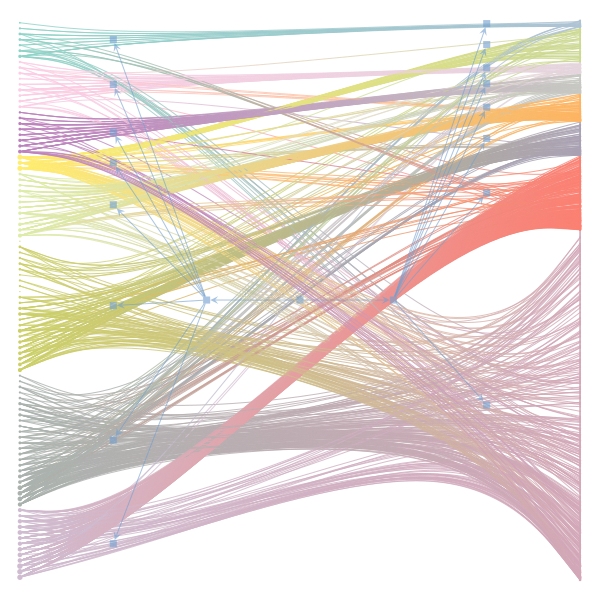

In [11]:
model.plot()

In [12]:
L = len(state.levels)

In [13]:
dict_groups_L = {}
if L == 2:
    model.L = 1
    for l in range(L-1):
        dict_groups_l = model.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
        ## omit trivial levels: l=L-1 (single group), l=L-2 (bipartite)
else:
    model.L = L-2
    for l in range(L-2):
        dict_groups_l = model.get_groups(l=l)
        dict_groups_L[l] = dict_groups_l
model.groups= dict_groups_L

/usr/lib/python3.6/site-packages/graph_tool/inference/overlap_blockmodel.py:287: UserWarning: unrecognized keyword arguments: ['overlap']
  str(list(kwargs.keys())))


In [14]:
model.get_groups(l=0)

/usr/lib/python3.6/site-packages/graph_tool/inference/overlap_blockmodel.py:287: UserWarning: unrecognized keyword arguments: ['overlap']
  str(list(kwargs.keys())))


{'Bd': 8, 'Bw': 8, 'p_tw_w': array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 'p_td_d': array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 1., 1., 0.

In [ ]:
## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit(B_min=2, B_max=10, verbose=True, overlap=True)

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

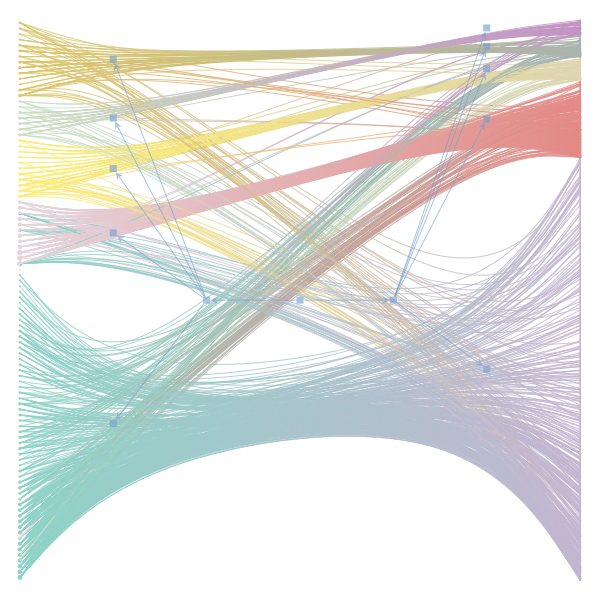

In [35]:
model.plot(nedges=1000)

In [25]:
model.plot("bipartitehSBM.pdf", nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [34]:
model.topics(l=0,n=200)

{0: [('ENSG00000120054', 0.10810810810810811),
  ('ENSG00000100142', 0.09009009009009009),
  ('ENSG00000135903', 0.09009009009009009),
  ('ENSG00000004846', 0.08108108108108109),
  ('ENSG00000077498', 0.06306306306306306),
  ('ENSG00000165192', 0.06306306306306306),
  ('ENSG00000105679', 0.06306306306306306),
  ('ENSG00000188467', 0.06306306306306306),
  ('ENSG00000124900', 0.05405405405405406),
  ('ENSG00000183146', 0.05405405405405406),
  ('ENSG00000134160', 0.04504504504504504),
  ('ENSG00000171195', 0.04504504504504504),
  ('ENSG00000198033', 0.036036036036036036),
  ('ENSG00000187172', 0.036036036036036036),
  ('ENSG00000118113', 0.036036036036036036),
  ('ENSG00000166558', 0.036036036036036036),
  ('ENSG00000065371', 0.036036036036036036)],
 1: [('ENSG00000154975', 0.008731082654249126),
  ('ENSG00000213401', 0.007566938300349243),
  ('ENSG00000197901', 0.006984866123399301),
  ('ENSG00000198028', 0.006984866123399301),
  ('ENSG00000164287', 0.006984866123399301),
  ('ENSG0000020

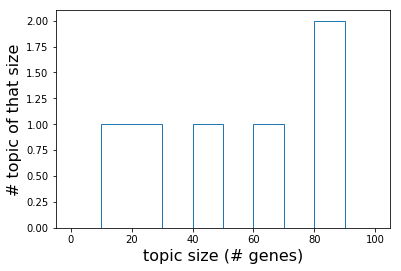

In [41]:
topic_lenghts = []
for topic in model.topics(l=0,n=2000):
    topic_lenghts.append(len(model.topics(l=0,n=2000)[topic]))
    
plt.figure()
plt.hist(topic_lenghts, histtype='step', range=(0,100), bins=10)
plt.xlabel("topic size (# genes)", fontsize=16)
plt.ylabel("# topic of that size", fontsize=16)
plt.show()
fig.savefig("topic_size.png")

In [16]:
for ensg in model.topics(l=0,n=200)[2]:
    print(ensg[0])

ENSG00000140522
ENSG00000184672
ENSG00000116147
ENSG00000156395
ENSG00000136267
ENSG00000256463
ENSG00000204347
ENSG00000122584
ENSG00000155511
ENSG00000075043
ENSG00000184486
ENSG00000077279
ENSG00000092054
ENSG00000152954
ENSG00000197177
ENSG00000253457
ENSG00000100678
ENSG00000169006
ENSG00000204655
ENSG00000168843
ENSG00000152208
ENSG00000177511
ENSG00000101203
ENSG00000072182
ENSG00000147481
ENSG00000205927
ENSG00000015592
ENSG00000170091
ENSG00000145526
ENSG00000105605
ENSG00000077080
ENSG00000177108
ENSG00000178235
ENSG00000148604
ENSG00000204071
ENSG00000152910
ENSG00000187135
ENSG00000182968
ENSG00000113327
ENSG00000171587
ENSG00000164588
ENSG00000188674
ENSG00000198739
ENSG00000152214
ENSG00000134376
ENSG00000169181
ENSG00000125462
ENSG00000144285
ENSG00000165566
ENSG00000013293
ENSG00000172995
ENSG00000165478
ENSG00000180332
ENSG00000162728
ENSG00000145451
ENSG00000187902
ENSG00000130287
ENSG00000111783
ENSG00000136297
ENSG00000163630
ENSG00000150275
ENSG00000089169
ENSG0000

## Topic-distribution in each document
Which topics contribute to each document?

In [38]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=0)

00e2c524-8a29-46d7-bf88-ed5f9c3dcf32


[(0, 0.7666666666666667),
 (1, 0.2),
 (2, 0.03333333333333333),
 (3, 0.0),
 (4, 0.0)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [39]:
model.clusters(l=0,n=5)

{0: [('ffd7b10e-8c0c-4aeb-81a0-b060108d57fa', 1.0),
  ('95234108-3579-4c2c-af95-7c6780270af4', 1.0),
  ('8d13e259-238e-4d2f-b9d3-4cffd4302abb', 1.0),
  ('89c025ed-103f-4372-882c-d996ff60a1cc', 1.0),
  ('875c4c80-bbe2-4ab7-b276-adc8ecaa987c', 1.0)],
 1: [('6a2fc43b-131d-4bba-8e64-8a39243fcdc6', 1.0),
  ('171a4828-984e-4225-b16c-c0bd6c319e06', 1.0),
  ('3a657ffc-d6c1-44a6-8d6f-a955e5d1fe35', 1.0),
  ('39952ce1-cb34-48c6-ad20-7aca8286f4ef', 1.0),
  ('b41174a5-4db8-438c-a9fa-6da8c08a9c75', 1.0)],
 2: [('b25c8e4d-f6ca-4079-9120-b96147b9091e', 1.0),
  ('38083e21-7761-47c7-9112-769c7f85e283', 1.0),
  ('9ae4ee25-88d4-4078-b6cc-f744c50dde8a', 1.0),
  ('22b2edfc-baf9-4a23-b87a-ae4c1b249664', 1.0),
  ('0b82329b-b34a-4cf5-ae33-f774c6401745', 1.0)],
 3: [('1f0f7598-d8c0-41ba-8b07-c958fecbb5f7', 1.0),
  ('1006434c-1c1b-47a3-bbf0-8d331d8e1722', 1.0),
  ('426b94fe-fcff-49f2-9d0b-c7cb49bb5559', 1.0),
  ('4dbc0492-036f-470c-800d-03b82a81d10d', 1.0),
  ('891d5512-0e8d-4dac-9f76-71aeae3937a6', 1.0)],
 4: 

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [41]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=0)

2 0a15de63-cefc-429b-a1b3-b9140a251325


[(0, '00e2c524-8a29-46d7-bf88-ed5f9c3dcf32'),
 (1, '042b37c5-7ba2-4731-8b16-5510cce257b4'),
 (8, '14a7070c-a557-4091-a6d7-f5900636aa57'),
 (13, '1f781542-09e0-48ff-8363-3a6cef4ebc83'),
 (16, '25b57a17-29ab-41f6-8809-45cf5b58a329'),
 (17, '26657b95-de92-4d40-a793-a9ef7ccaa352'),
 (20, '29dab10a-a0a0-4dbd-b574-97c22b70a3f1'),
 (25, '3a34e792-461f-45f5-9c4e-a29deeef9ce2'),
 (28, '418eab89-5e78-4be3-ba93-c9dc2a7d1c68'),
 (30, '43716956-aa57-46fb-afd7-0d244f21af00'),
 (31, '459da4d7-7821-4275-a733-576e4504ce5f'),
 (32, '48297930-d22a-463d-80ac-52214964f067'),
 (33, '4b68dd95-805d-42cc-a1e8-9bb64e29f9f5'),
 (34, '4d5b0ba8-64d8-404b-9a83-fc4111686afe'),
 (38, '54b3225b-c8ae-4fef-a346-735e6ee576f9'),
 (39, '54d00fcb-6468-4716-9491-d1094a250d46'),
 (40, '55f30812-1dc9-4ca8-b3f7-7762de3f961d'),
 (41, '586ea1a7-d99f-46ef-aba9-1ae0d8a28e3e'),
 (42, '62d1ce0e-55a8-4c31-9e96-e0c0cb95235f'),
 (43, '65312630-1884-4160-b812-d932fc0a7c78'),
 (44, '656900ef-bf75-4cc8-a73f-80b4a88a97fd'),
 (45, '67418961-

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

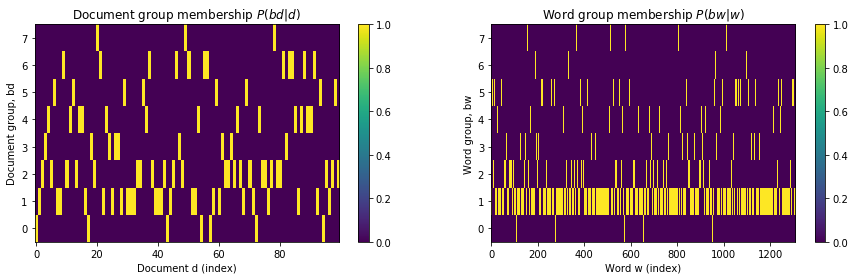

In [17]:
p_td_d,p_tw_w = model.group_membership(l=0)
fig = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()
plt.show()

In [18]:
fig.savefig("group_membership.pdf")

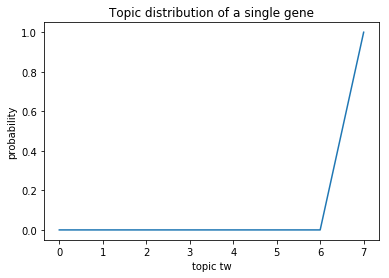

In [19]:
gene=1200
fig=plt.figure()
plt.title("Topic distribution of a single gene")
plt.xlabel("topic tw")
plt.ylabel("probability")
plt.plot(p_tw_w.T[gene])
plt.show()
fig.savefig("distribution_single_gene_%d.png"%gene)

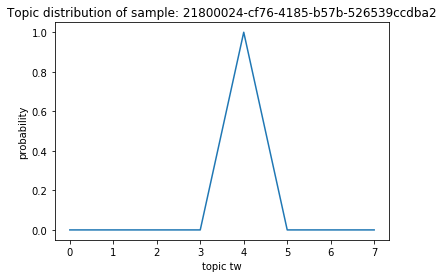

In [22]:
doc=14
title = model.documents[doc]
fig=plt.figure()
plt.title("Topic distribution of sample: %s"%title)
plt.xlabel("topic tw")
plt.ylabel("probability")
plt.plot(p_td_d.T[doc])
plt.show()
fig.savefig("distribution_single_sample_%d.png"%doc)

# state analysis

In [23]:
state = model.state

In [24]:
level = state.get_levels()[0]

In [25]:
level.get_blocks()[4]

0

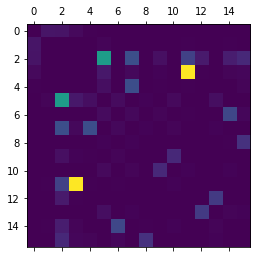

In [26]:
e=level.get_matrix()
plt.matshow(e.todense())

In [27]:
model.print_topics(l=0)

In [28]:
model.print_summary()

l: 0, N: 1409, B: 16
l: 1, N: 16, B: 2
l: 2, N: 2, B: 1


In [ ]:
groups = model.groups[3]

In [ ]:
np.sum(groups['p_tw_d'],axis=0)

In [ ]:
groups['p_tw_d']

In [ ]:
groups

In [29]:
groups = model.groups[0]

### topicdist

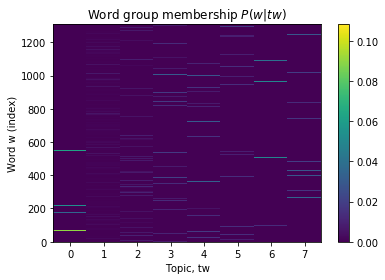

In [30]:
p_w_tw = groups['p_w_tw']
fig=plt.figure()
plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(w | tw)$')
plt.xlabel('Topic, tw')
plt.ylabel('Word w (index)')
plt.colorbar()
fig.savefig("p_w_tw.png")

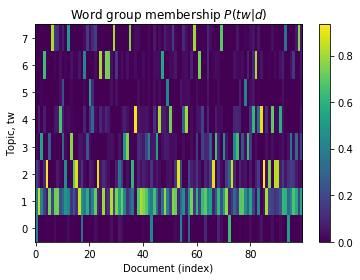

In [31]:
p_tw_d = groups['p_tw_d']
fig=plt.figure()
plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(tw | d)$')
plt.xlabel('Document (index)')
plt.ylabel('Topic, tw')
plt.colorbar()
fig.savefig("p_tw_d.png")